### Required Codio Assignment 13.1: Introduction to Logistic Regression with Scikit-Learn

**Expected Time = 60 minutes** 

**Total Points = 60** 

This activity introduces the `LogisticRegression` estimator from scikit-learn.  After fitting the model on a single feature for binary classes, you will plot the sigmoid curve to represent the learned model in terms of probabilities.  Finally, you will evaluate the model in terms of accuracy, precision, and recall.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from scipy.optimize import minimize

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Text(0.5, 1.0, 'Flipper Length by Species')

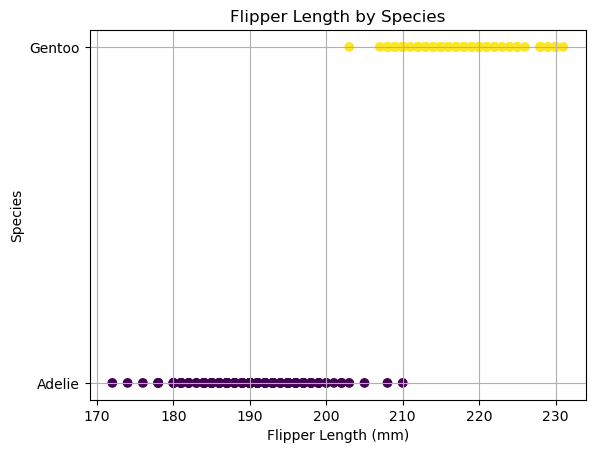

In [3]:
plt.scatter(X, penguins.species, c = y)
plt.grid()
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Species')
plt.title('Flipper Length by Species')

[Back to top](#-Index)

### Problem 1

#### Building a Logistic Model

**10 Points**


Instantiate and fit a `LogisticRegression` estimato the the `log_reg` variable on the training data `X_train` and `y_train`. 
 

In [4]:
### GRADED

logreg = ''

### BEGIN SOLUTION
logreg = LogisticRegression().fit(X_train, y_train)
### END SOLUTION

# Answer check
print(logreg)

LogisticRegression()


[Back to top](#-Index)

### Problem 2

#### Examining the coefficients

**10 Points**

Similar to the `LinearRegression` estimator, your `log_reg` estimator now has a `.coef_` and `.intercept_` attribute.  Your goal is to calculate a linear combination of the input with these coefficients and intercept terms.

Below, complete the function `linear_predictions` that takes in a fit regression model `model`, and a feature array `X`.  This function should return the predictions according to the formula: $$ \text{intercept} + \text{coef}*X$$ 

In [5]:
### GRADED

def linear_predictions(model, X):
    """
    This function takes in a fit linear model
    and returns the models intercept + coefs*X
    
    Arguments
    ---------
    model: scikitlearn.linear_model 
           Linear Model estimator -- Linear or Logistic Regression
           that is already fit
    X: pd.DataFrame (N,1)
        1 Feature DataFrame with 1 feature
        
    Returns
    --------
    odds: pd.DataFrame
         Array of odds based on input X
    """
    return None

### BEGIN SOLUTION
def linear_predictions(model, X):
    return model.coef_*X + model.intercept_
### END SOLUTION

# Answer check
predictions = linear_predictions(logreg, X_train)
np.round(predictions.head())

,flipper_length_mm
92,-17.0
340,7.0
43,-8.0
220,4.0
253,19.0


[Back to top](#-Index)

### Problem 3

#### Examining the log odds

**10 Points**

The predictions above are the logarithmic odds for the positive class.  In order to interpret these as probabilities, you need to return to the original sigmoid form using the formula:

$$\sigma(x) = \frac{1}{1 + e^{-(ax + b)}}$$

Complete the function `sigma` below that takes as input the array  `predictions`. This function should return the values of the sigmoid function evaluated at `predictions`.  The results should look like the image below when plotted.

<center>
    <img src = 'images/sigmoid.png' />
</center>

In [6]:
### GRADED

def sigma(predictions):
    """
    This function takes in predictions as log odds and
    returns their probability of being the positive class
    in a binary classification setting.
    
    Arguments
    ---------
    predictions; np.array
            array of log odds prediction values for each data
            point
    Returns
    ---------
    probabilities: np.array
            array of probabilities for positive class
    """
    return None

### BEGIN SOLUTION
def sigma(predictions):
    return 1/(1 + np.exp(-predictions))
### END SOLUTION

# Answer check
probs = sigma(predictions)
print(probs)

     flipper_length_mm
92        3.984942e-08
340       9.991126e-01
43        2.706259e-04
220       9.784955e-01
253       1.000000e+00
..                 ...
25        1.982262e-07
263       9.996019e-01
77        1.786704e-08
112       2.439876e-05
108       1.610438e-09

[198 rows x 1 columns]


[Back to top](#-Index)

### Problem 4

#### Making Class Predictions

**10 Points**

In this exercise you will use the probabilities obtained from the sigmoid function to make predictions.  

Specifically, if a probability is greater than or equal to 0.5, assign this to the positive class `1`, otherwise assign it to the class `0`.  Assign your solution as a numpy array to `class_predictions` below.

In [7]:
### GRADED

class_predictions = ''

### BEGIN SOLUTION
class_predictions = np.where(sigma(predictions) >= 0.5, 1, 0)
### END SOLUTION

# Answer check
print(np.unique(class_predictions, return_counts=True)[1])

[105  93]


[Back to top](#-Index)

### Problem 5

#### Using the `predict_proba` method

**10 Points**

You don't need to go through this process each time you fit a Logistic model to determine these probabilities. 

The `LogisticRegression` estimator has a `.predict_proba` method to calculate the predictions that returns the probabilities for each class as a 2D NumPy array. 

Below, use the `.predict_proba` method of the `logreg` object on the test data `X_test` as a 1D NumPy array. Assign the result to `positive_probs`.



In [8]:
### GRADED

positive_probs = ''

### BEGIN SOLUTION
positive_probs = logreg.predict_proba(X_test)[:, 1]
### END SOLUTION

# Answer check
print(positive_probs.shape) #(67,)
#plt.scatter(X_test, positive_probs, c = y_test)

(67,)


[Back to top](#-Index)

### Problem 6

#### Scoring the Classifier

**10 Points**

You may be interested in different metrics for your classifier.  

Below, use the `predict` function of the `logreg` method with arugmemnt equal to `X_test` to calculate your predictions. Assign the result to `preds`.

Then, use the functions `accuracy_score`, `precision_score`, and `recall_score`to calcutate the accuracy, precision, and recall for your model. Assing the results to `accuracy`, `precision`, and `recall`, respectively.


In [9]:
### GRADED
preds = ''
accuracy = ''
precision = ''
recall = ''

### BEGIN SOLUTION
preds = logreg.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy: .2f}\nPrecision: {precision: .2f}\nRecall: {recall: .2f}')

Accuracy:  0.99
Precision:  1.00
Recall:  0.96


From this example it seems you have a powerful classifier.  In the following activity, you will explore more about exactly where these coefficients come from and how they are determined in general.  